## Conjuntos de dados

Fonte: https://br.financas.yahoo.com/quote/GOOG/history?p=GOOG

- Dados de treinamento: valores de abertura (*Open*) da bolsa no período de 02-01-2015 até 30-12-2019 (arquivo: **GOOG_train.csv**)

- Dados de teste: valores de abertura (*Open*) da bolsa no período de 02-01-2020 até 30-01-2020 (arquivo: **GOOG_train.test**)

- Janela temporal (*timesteps*): 60 dias



## Clona repositório de dados da disciplina hospedado no GitHUb

In [10]:
!git clone "https://github.com/malegopc/AM2PUCPOC"

fatal: destination path 'AM2PUCPOC' already exists and is not an empty directory.


## Leitura e preparação dos dados

Vamos começar importando o arquivo CSV com os dados de treinamento usando o Pandas.

In [23]:
import pandas as pd
# lê arquivo de dados
dataset_train = pd.read_csv('AM2PUCPOC/Datasets/Ações_Google/GOOG_train.csv')
# mostra os dados
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447500
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059800
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500
...,...,...,...,...,...,...,...
1252,2019-12-23,1355.869995,1359.800049,1346.510010,1348.839966,1348.839966,883100
1253,2019-12-24,1348.500000,1350.260010,1342.780029,1343.560059,1343.560059,347500
1254,2019-12-26,1346.170044,1361.327026,1344.469971,1360.400024,1360.400024,667500
1255,2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400


## Separa os atributos de treinamento

Extrai a coluna "Open" (valores de abertura da ação).


In [24]:
training_set = dataset_train.iloc[:, 1:2].values # coluna 1
print(training_set)
print(training_set.shape)

[[ 527.561584]
 [ 521.827332]
 [ 513.589966]
 ...
 [1346.170044]
 [1362.98999 ]
 [1350.      ]]
(1257, 1)


## Escalonamento dos dados

Padroniza os dados para uma distribuição com média 0 e desvio-padrão 1.

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(training_set)
training_set_scaled = sc.transform(training_set)
print("Média dos dados originais",sc.mean_)
print("Variância dos dados originais",sc.var_)
#training_set_scaled = sc.fit_transform(training_set)

Média dos dados originais [912.99831862]
Variância dos dados originais [53074.26204324]


In [33]:
print("Média dos dados escalonados: ",round(training_set_scaled.mean()))
print("Variância dos dados escalonados: ",round(training_set_scaled.var()))

Média dos dados escalonados:  0
Variância dos dados escalonados:  1


## Gráfico dos dados originais e escalonados

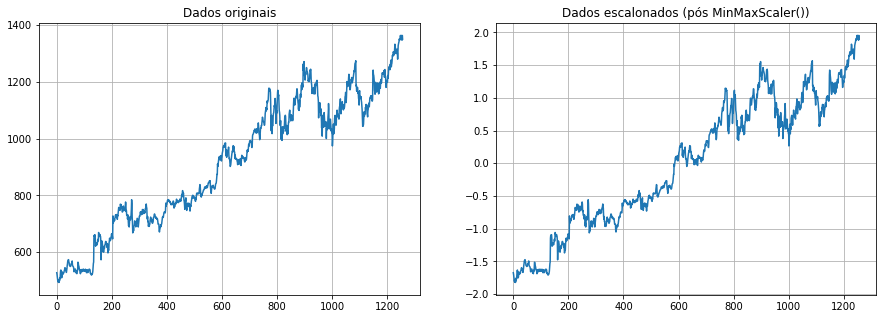

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title("Dados originais")
plt.plot(training_set)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title("Dados escalonados (pós MinMaxScaler())")
plt.plot(training_set_scaled)
plt.grid(True)
plt.show()